In [2]:
import re
import locale
from datetime import date, datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

/tmp/ipykernel_175521/286833584.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_excel('../data/texts/pressemeldungen.xlsx')
df['date'] = pd.to_datetime(df['date'])
df = df.replace({np.nan: None, pd.NaT: None})

In [4]:
df.head()

,Unnamed: 0,ministry,li,raw_date,descriptor,title,file,src,contains_klima,contains_\bklima\b,contains_\bklimawandel\b,contains_\bklimaschutz\b,date
0,0,AA,0,23.01.2024,Artikel,Aktuelle reisemedizinische Hinweise,../data/texts/AA/AA_0000.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-23 00:00:00
1,1,AA,1,22.01.2024,Artikel,Außenministerin Baerbock beim EU -Rat in Brüss...,../data/texts/AA/AA_0001.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-22 00:00:00
2,2,AA,2,22.01.2024,Artikel,Öffentliche Auftragsvergaben,../data/texts/AA/AA_0002.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-22 00:00:00
3,3,AA,3,19.01.2024,Artikel,Kuwait: Steckbrief,../data/texts/AA/AA_0003.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-19 00:00:00
4,4,AA,4,19.01.2024,Artikel,Solange wie nötig: Deutschlands Unterstützung ...,../data/texts/AA/AA_0004.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-19 00:00:00


In [5]:
k = 'contains_\\bklima\\b'
print(f"Meldungen in denen 'Klima' (einzeln) auftaucht: {df[df[k] == 'x'].shape[0]:,}")
print(f"Meldungen in denen 'Klima' auftaucht: {df[df['contains_klima'] == 'x'].shape[0]:,}")
k = 'contains_\\bklimawandel\\b'
print(f"Meldungen in denen 'Klimawandel' auftaucht: {df[df[k] == 'x'].shape[0]:,}")
k = 'contains_\\bklimaschutz\\b'
print(f"Meldungen in denen 'Klimaschutz' auftaucht: {df[df[k] == 'x'].shape[0]:,}")
print(f"Meldungen gesamt: {df.shape[0]:,}")

Meldungen in denen 'Klima' (einzeln) auftaucht: 1,851
Meldungen in denen 'Klima' auftaucht: 6,886
Meldungen in denen 'Klimawandel' auftaucht: 1,451
Meldungen in denen 'Klimaschutz' auftaucht: 3,870
Meldungen gesamt: 26,189


In [6]:
tmp = []
for mnstry in df['ministry'].unique():
    sub = df[df['ministry'] == mnstry]
    c0 = sub[sub['contains_\\bklima\\b'] == 'x'].shape[0]
    c1 = sub[sub['contains_klima'] == 'x'].shape[0]
    c2 = sub[sub['contains_\\bklimawandel\\b'] == 'x'].shape[0]
    c3 = sub[sub['contains_\\bklimaschutz\\b'] == 'x'].shape[0]
    tmp.append({'m': mnstry, 'total': sub.shape[0], 'klima': c1, 'bklima': c0, 'ks': c3, 'kw': c2})
    print(
        f"{sub.shape[0]:,} Artikel von {mnstry}, davon {c1:,} mit 'Klima', {c0:} mit 'Klima' (einzeln), {c2} mit 'Klimawandel', und {c3} mit 'Klimaschutz'")
dfc = pd.DataFrame(tmp)

327 Artikel von AA, davon 76 mit 'Klima', 28 mit 'Klima' (einzeln), 18 mit 'Klimawandel', und 25 mit 'Klimaschutz'
6,882 Artikel von BMUV_ARCHIVE, davon 2,979 mit 'Klima', 795 mit 'Klima' (einzeln), 650 mit 'Klimawandel', und 1872 mit 'Klimaschutz'
1,652 Artikel von BMBF, davon 328 mit 'Klima', 120 mit 'Klima' (einzeln), 118 mit 'Klimawandel', und 106 mit 'Klimaschutz'
1,975 Artikel von BMWK, davon 1,110 mit 'Klima', 179 mit 'Klima' (einzeln), 58 mit 'Klimawandel', und 775 mit 'Klimaschutz'
425 Artikel von BMF, davon 88 mit 'Klima', 18 mit 'Klima' (einzeln), 11 mit 'Klimawandel', und 43 mit 'Klimaschutz'
354 Artikel von BMEL, davon 200 mit 'Klima', 98 mit 'Klima' (einzeln), 19 mit 'Klimawandel', und 76 mit 'Klimaschutz'
1,913 Artikel von BMFSFJ, davon 49 mit 'Klima', 15 mit 'Klima' (einzeln), 13 mit 'Klimawandel', und 8 mit 'Klimaschutz'
371 Artikel von BMZ_CURRENT, davon 224 mit 'Klima', 96 mit 'Klima' (einzeln), 118 mit 'Klimawandel', und 95 mit 'Klimaschutz'
432 Artikel von BMUV_CUR

In [7]:
dfc['klima%'] = dfc['klima'] / dfc['total']
dfc['bklima%'] = dfc['bklima'] / dfc['total']
dfc['ks%'] = dfc['ks'] / dfc['total']
dfc['kw%'] = dfc['kw'] / dfc['total']
dfc

,m,total,klima,bklima,ks,kw,klima%,bklima%,ks%,kw%
0,AA,327,76,28,25,18,0.232416,0.085627,0.076453,0.055046
1,BMUV_ARCHIVE,6882,2979,795,1872,650,0.432868,0.115519,0.272014,0.094449
2,BMBF,1652,328,120,106,118,0.198547,0.072639,0.064165,0.071429
3,BMWK,1975,1110,179,775,58,0.562025,0.090633,0.392405,0.029367
4,BMF,425,88,18,43,11,0.207059,0.042353,0.101176,0.025882
5,BMEL,354,200,98,76,19,0.564972,0.276836,0.214689,0.053672
6,BMFSFJ,1913,49,15,8,13,0.025614,0.007841,0.004182,0.006796
7,BMZ_CURRENT,371,224,96,95,118,0.603774,0.258760,0.256065,0.318059
8,BMUV_CURRENT,432,302,123,174,60,0.699074,0.284722,0.402778,0.138889
9,BMVG,514,11,2,6,0,0.021401,0.003891,0.011673,0.000000


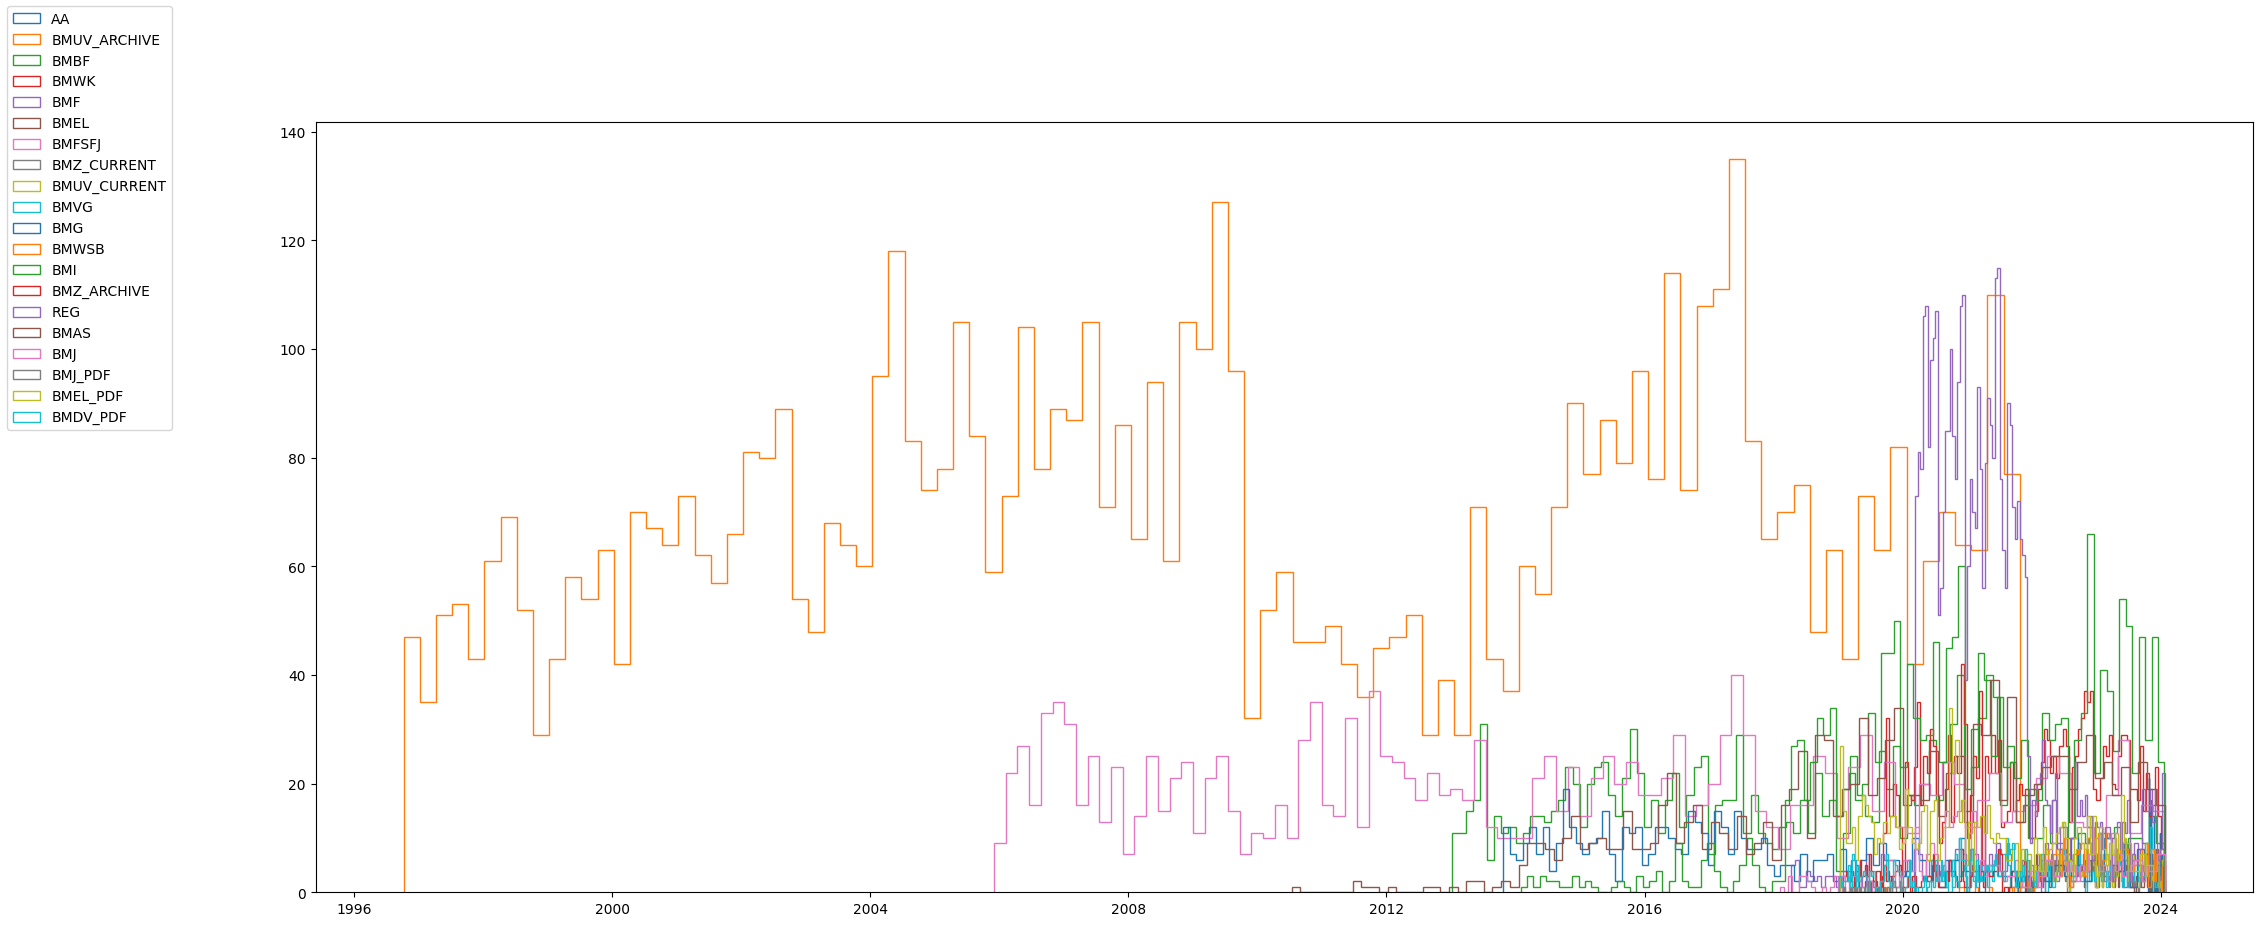

In [8]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(25, 10))
for mnstry in df['ministry'].unique():
    ax.hist(df[df['ministry'] == mnstry]['date'], label=mnstry, bins=100, histtype='step')
fig.legend(loc='upper left')

array([[<Axes: title={'center': 'AA'}>, <Axes: title={'center': 'BMAS'}>,
        <Axes: title={'center': 'BMBF'}>,
        <Axes: title={'center': 'BMDV_PDF'}>],
       [<Axes: title={'center': 'BMEL'}>,
        <Axes: title={'center': 'BMEL_PDF'}>,
        <Axes: title={'center': 'BMF'}>,
        <Axes: title={'center': 'BMFSFJ'}>],
       [<Axes: title={'center': 'BMG'}>, <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'BMJ'}>,
        <Axes: title={'center': 'BMJ_PDF'}>],
       [<Axes: title={'center': 'BMUV_ARCHIVE'}>,
        <Axes: title={'center': 'BMUV_CURRENT'}>,
        <Axes: title={'center': 'BMVG'}>,
        <Axes: title={'center': 'BMWK'}>],
       [<Axes: title={'center': 'BMWSB'}>,
        <Axes: title={'center': 'BMZ_ARCHIVE'}>,
        <Axes: title={'center': 'BMZ_CURRENT'}>,
        <Axes: title={'center': 'REG'}>]], dtype=object)

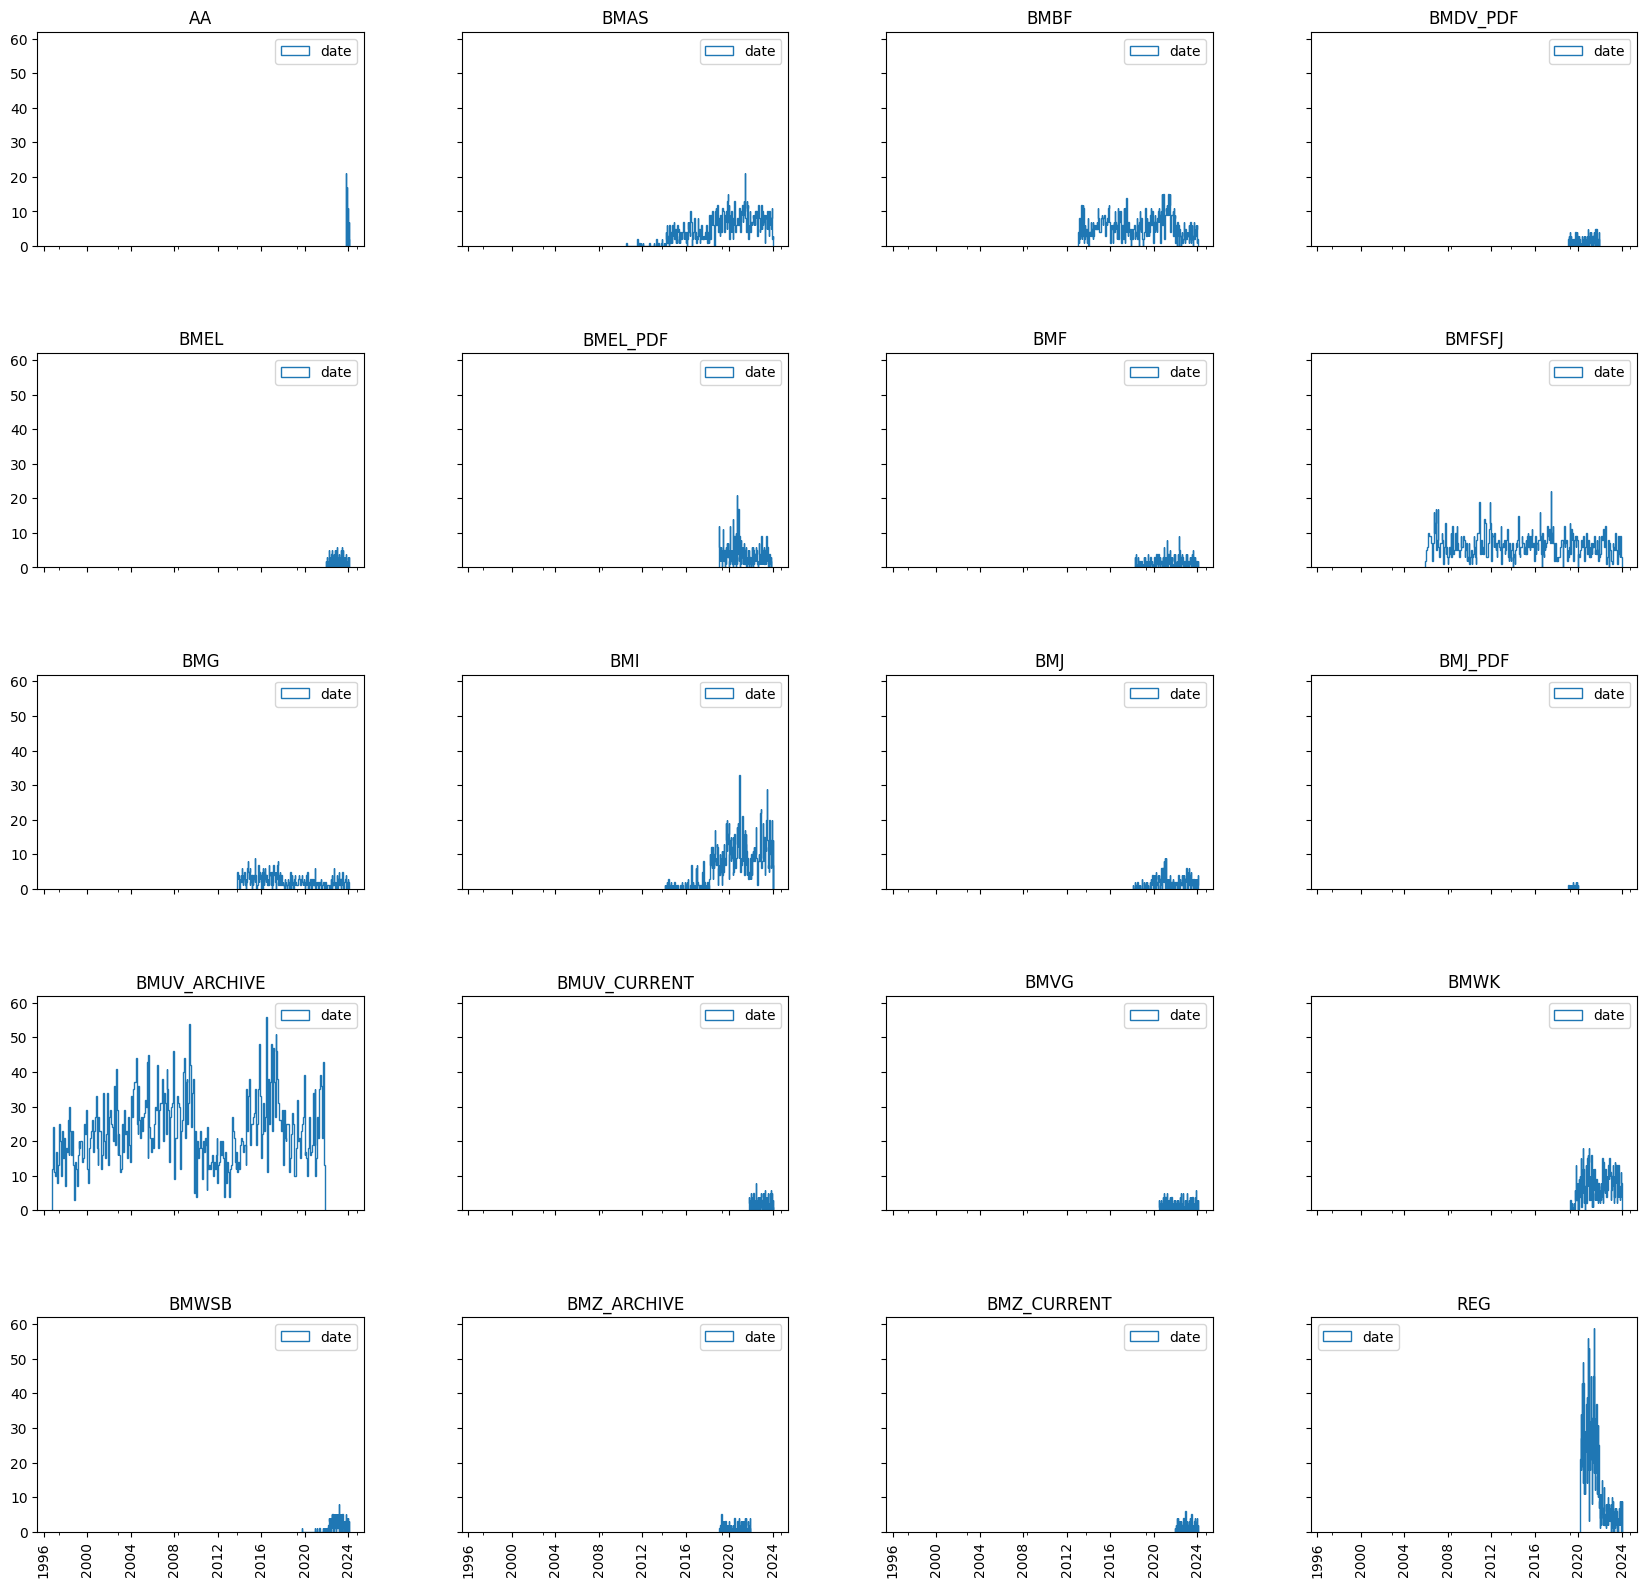

In [9]:
df.hist('date', by='ministry', histtype='step', bins=300, legend=True, sharex=True, sharey=True, figsize=(20, 20))

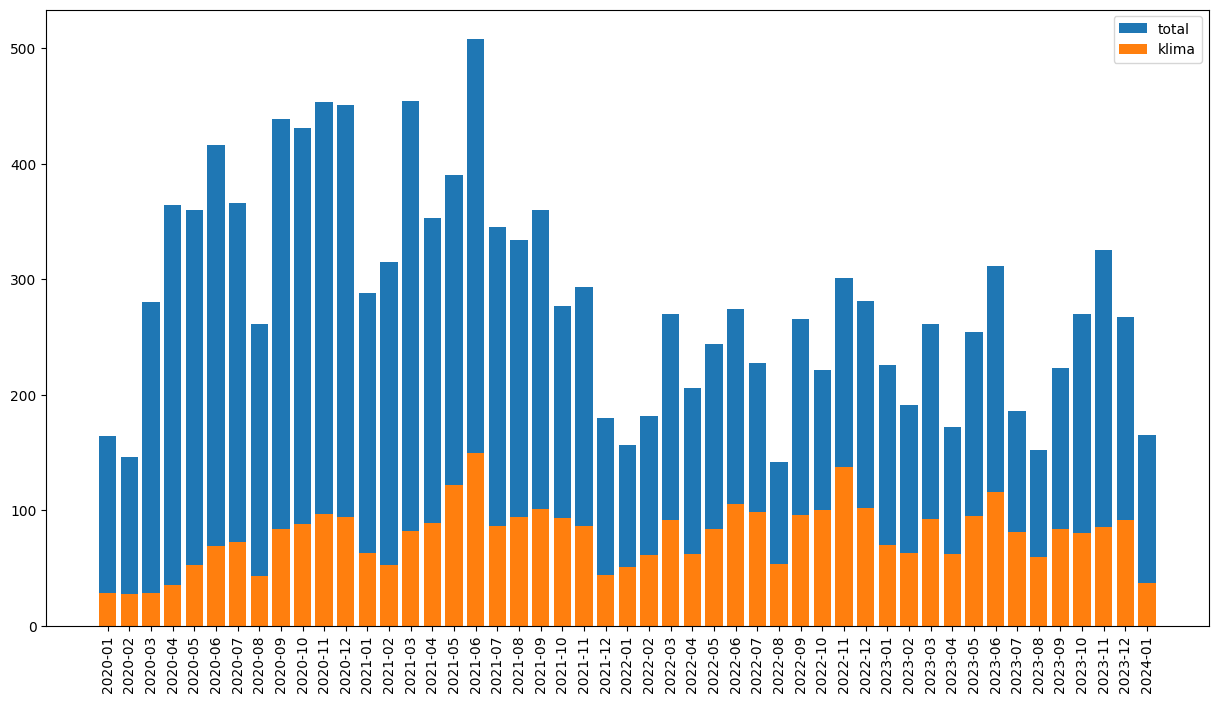

In [10]:
df['grp'] = [i.strftime('%Y-%m') if i else None for i in df['date']]
cnts = df[df['grp'] >= '2020-01'].groupby('grp').count()

plt.figure(figsize=(15, 8))
plt.bar(cnts.index, cnts['ministry'], label='total')
plt.bar(cnts.index, cnts['contains_klima'], label='klima')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [11]:
cnts

,Unnamed: 0,ministry,li,raw_date,descriptor,title,file,src,contains_klima,contains_\bklima\b,contains_\bklimawandel\b,contains_\bklimaschutz\b,date
grp,,,,,,,,,,,,,
2020-01,164,164,164,164,157,162,164,164,28,9,2,20,164
2020-02,146,146,146,146,143,145,146,146,27,8,3,13,146
2020-03,280,280,280,280,269,280,280,280,28,8,7,11,280
2020-04,364,364,364,364,357,364,364,364,35,8,6,20,364
2020-05,360,360,360,360,356,360,360,360,52,10,9,21,360
2020-06,416,416,416,416,406,414,416,416,69,22,17,37,416
2020-07,366,366,366,366,362,366,366,366,72,23,15,32,366
2020-08,261,261,261,261,256,260,261,261,43,13,5,14,261
2020-09,439,439,439,439,430,438,439,439,84,26,14,45,439


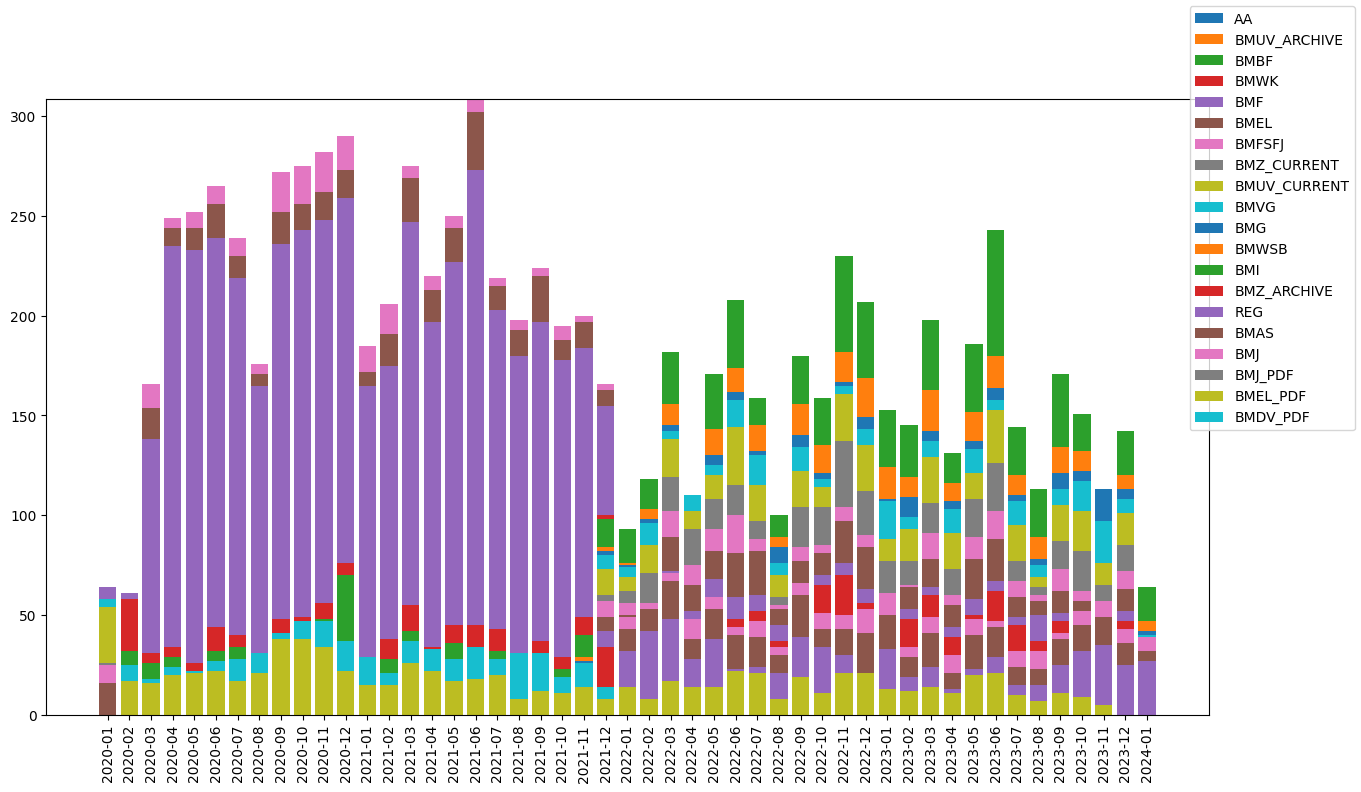

In [12]:
df['grp'] = [i.strftime('%Y-%m') if i else None for i in df['date']]
basefilter = df['grp'] >= '2020-01'
fig = plt.figure(figsize=(15, 8))
base = df[basefilter].groupby('grp').count()['ministry'] - df[basefilter].groupby('grp').count()['ministry']

for m in df['ministry'].unique():
    cnts = df[basefilter & (df['ministry'] == m)].groupby('grp').count()
    bars = cnts['ministry'] + base - base
    plt.bar(bars.index, bars, label=m, bottom=base)
    base += cnts['ministry']
    base.replace({np.nan: 0, pd.NaT: 0}, inplace=True)
plt.xticks(rotation=90)
fig.legend(loc='outside right upper')
plt.show(fig)